In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import torch
import numpy as np

Mounted at /content/drive


In [ ]:
from torchvision import models
import torch.nn as nn

In [ ]:
resnet18 = models.resnet18(weights=None)

In [ ]:
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 10)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = resnet18.to(device)

print(f"ResNet-18 is ready on {device}!")

ResNet-18 is ready on cpu!


In [ ]:
resnet18 = resnet18.to(device)
resnet18.load_state_dict(torch.load('/content/drive/MyDrive/Resnet18modelSaved.pth', map_location=device))
resnet18.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
resnet_image = torch.randn((1, 3, 28, 28), requires_grad=True, device=device)

In [ ]:
x = resnet18.conv1(resnet_image)
x = resnet18.bn1(x)
x = resnet18.relu(x)
x = resnet18.maxpool(x)
x = resnet18.layer1(x)


In [ ]:
x.shape

torch.Size([1, 64, 7, 7])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Layer 1: 3 input channels (RGB), 16 filters, 3x3 kernel
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        # Layer 2: 16 input channels, 32 filters, 3x3 kernel
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        # Max pooling to shrink the image size
        self.pool = nn.MaxPool2d(2, 2)

        # After two 2x2 pools, a 28x28 image becomes 7x7
        # 32 filters * 7 * 7 = 1568 features
        self.fc = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 28x28 -> 14x14
        x = self.pool(F.relu(self.conv2(x))) # 14x14 -> 7x7
        x = torch.flatten(x, 1)              # Flatten to 1D
        x = self.fc(x)                       # Final 10 scores
        return x



In [ ]:
model_cnn = SimpleCNN().to(device)
model_cnn.load_state_dict(torch.load('/content/drive/MyDrive/3-simpleCNNmodelSaved.pth',map_location=device))
model_cnn.eval()

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [ ]:
simple_modelBG = SimpleCNN().to(device)
simple_modelBG.load_state_dict(torch.load('/content/drive/MyDrive/Resnet18BGmodelSaved.pth',map_location=device))  #filesSwappedWhileSaving:>
# simple_modelBG.eval()

<All keys matched successfully>

In [ ]:
resnet18BG = models.resnet18(weights=None)

In [ ]:
num_featuresBG = resnet18BG.fc.in_features

In [ ]:
resnet18BG.fc = nn.Linear(num_featuresBG, 10)

In [ ]:
resnet18BG = resnet18BG.to(device)
print(f"ResNet-18BG is ready on {device}!")

ResNet-18BG is ready on cuda!


In [ ]:
resnet18BG = resnet18BG.to(device)
resnet18BG.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/CNNBGmodelSaved.pth',map_location=device))  #filesSwappedWhileSaving:>
# resnet18BG.eval()

<All keys matched successfully>

In [ ]:
def freeze_model(model):
    for param in model.parameters():
        param.requires_grad = False
    model.eval() # Vital: Disables BatchNorm/Dropout changes

In [ ]:
freeze_model(model_cnn)
freeze_model(resnet18)

In [ ]:
freeze_model(simple_modelBG)

In [ ]:
def CreateImage():
  RandomImage = torch.randn((1,3,28,28),requires_grad=True,device=device)
  return RandomImage

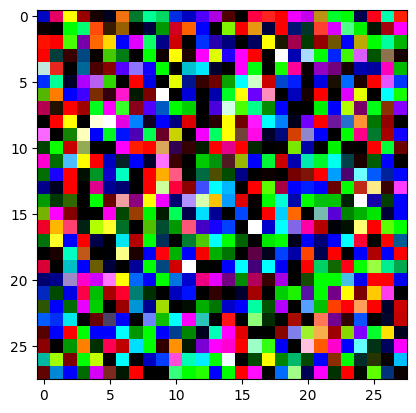

In [ ]:
import matplotlib.pyplot as plt
RandomImg = CreateImage()
plt.imshow(RandomImg.detach().cpu().permute(0,2,3,1)[0])


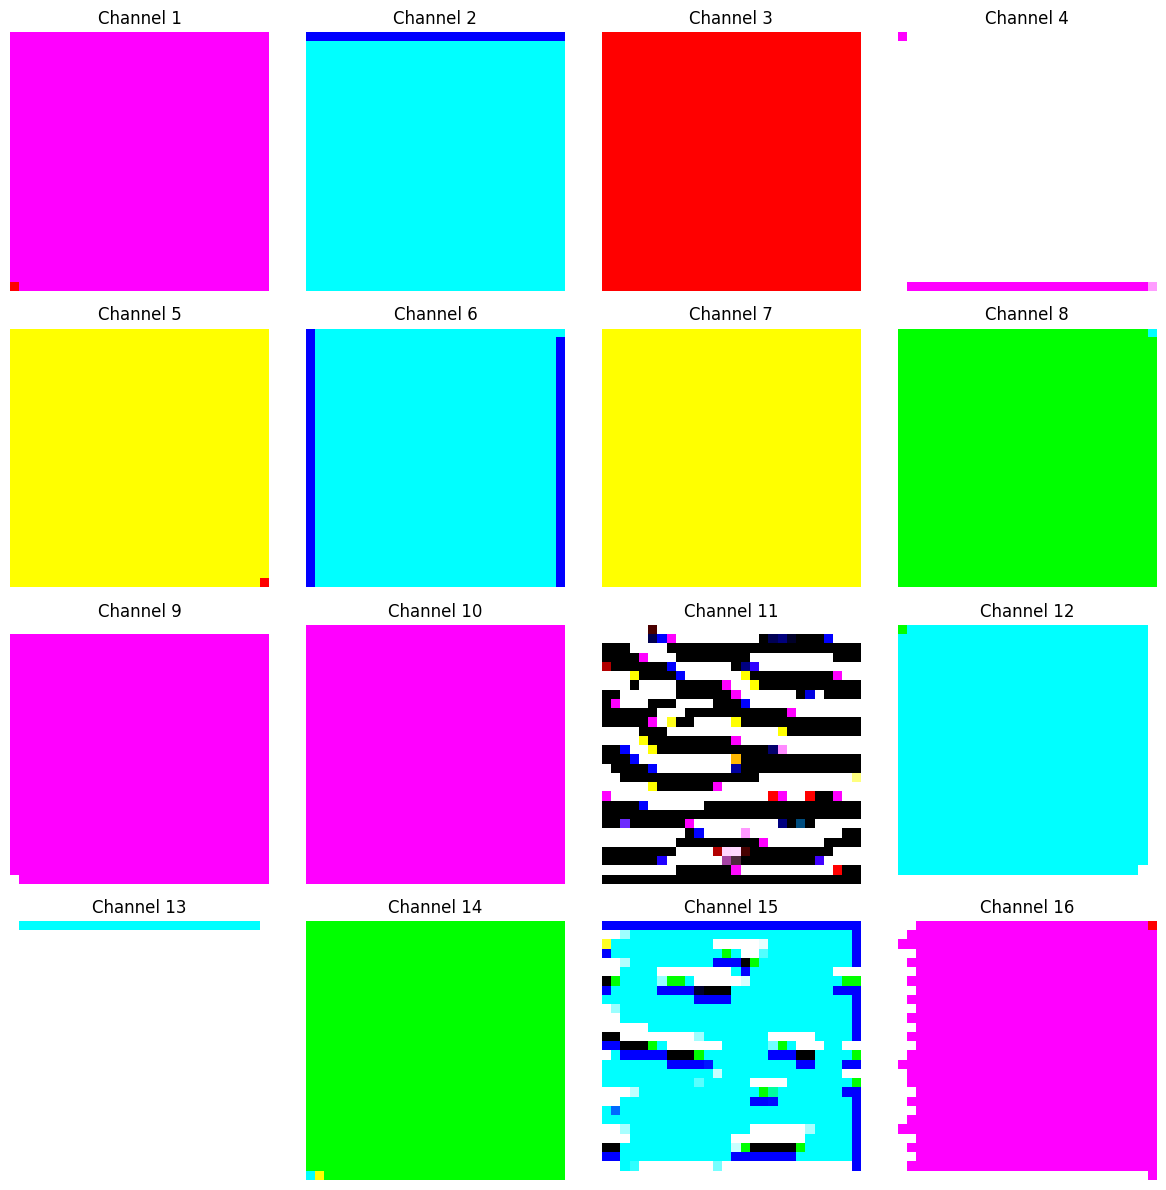

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Configuration
num_channels = 16
rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
# Loop through each channel
for channel_idx in range(num_channels):
    # Initialize a fresh random image for each channel
    RandomImage = CreateImage()
    # (Starting from random noise helps visualize what the filter "likes")
    optimizer = optim.Adam([RandomImage], lr=0.1)

    for i in range(100): # Reduced iterations for speed
        optimizer.zero_grad()

        # Forward pass through the first layer
        x = model_cnn.conv1(RandomImage)
        x = F.relu(x)
        # x = model_cnn.pool(x)
        # Target specific channel
        target_activation = x[0, channel_idx, :, :].mean()
        loss = -target_activation
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            RandomImage.clamp_(0, 1)

    # Plotting logic
    ax = axes[channel_idx // cols, channel_idx % cols]
    final_img = RandomImage.detach().permute(0, 2, 3, 1).squeeze().numpy()
    ax.imshow(final_img)
    ax.set_title(f"Channel {channel_idx+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
dummyImg = CreateImage()
x = x = model_cnn.conv1(dummyImg)
x = F.relu(x)
x = model_cnn.conv2(x)
x = F.relu(x)

In [ ]:
x.shape

torch.Size([1, 32, 28, 28])

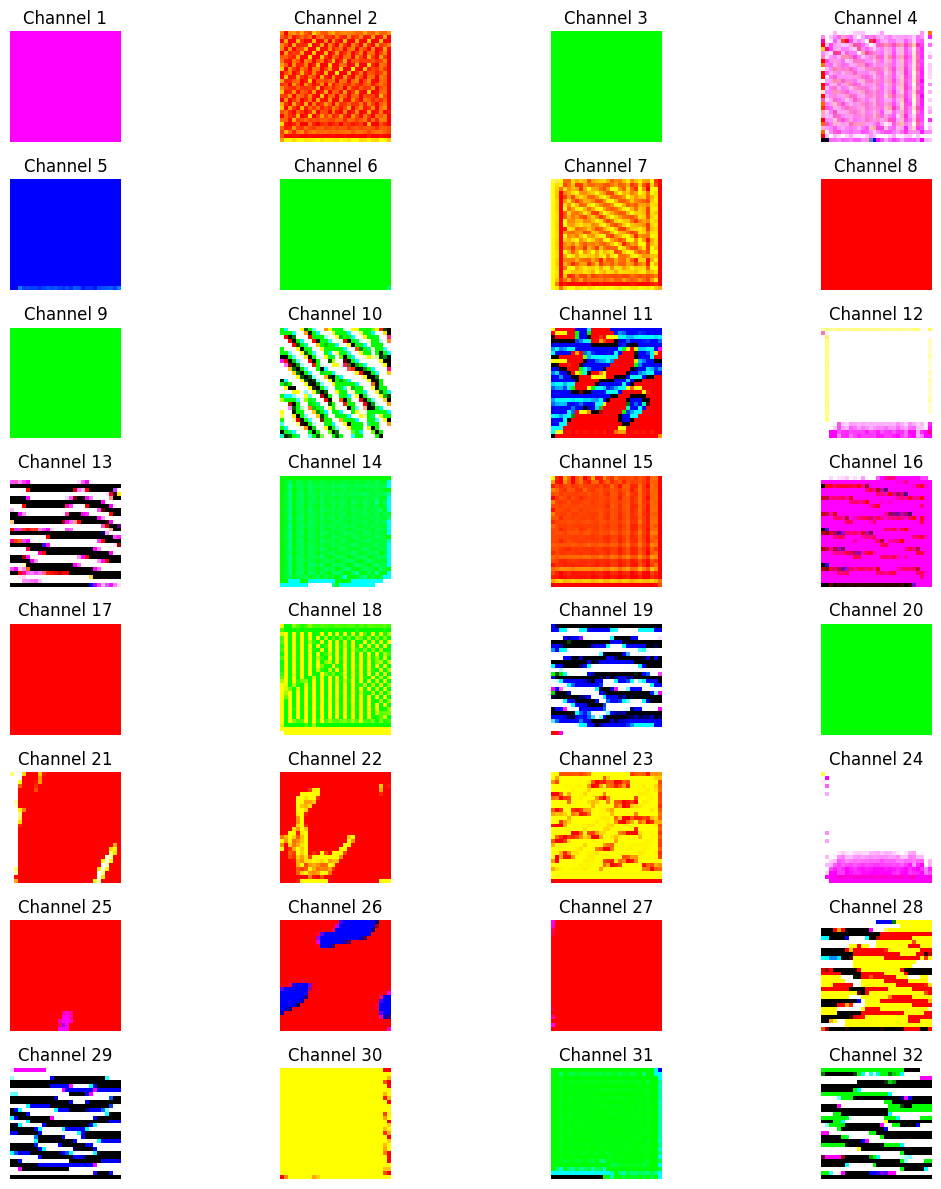

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Configuration
num_channels = 32
rows = (num_channels + cols - 1) // cols # Dynamically calculate rows
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
# Loop through each channel
for channel_idx in range(num_channels):
    # Initialize a fresh random image for each channel
    RandomImage = CreateImage()
    # (Starting from random noise helps visualize what the filter "likes")
    optimizer = optim.Adam([RandomImage], lr=0.1)

    for i in range(100): # Reduced iterations for speed
        optimizer.zero_grad()

        # Forward pass through the first layer
        x = model_cnn.conv1(RandomImage)
        x = F.relu(x)
        # x = model_cnn.pool(x)
        x = model_cnn.conv2(x)
        x = F.relu(x)
        # x = model_cnn.pool(x)
        # Target specific channel
        target_activation = x[0, channel_idx, :, :].mean()
        loss = -target_activation
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            RandomImage.clamp_(0, 1)

    # Plotting logic
    # Ensure axes is treated as a 2D array even if rows or cols is 1
    if rows == 1 and cols == 1:
        ax = axes
    elif rows == 1 or cols == 1:
        ax = axes[channel_idx]
    else:
        ax = axes[channel_idx // cols, channel_idx % cols]
    final_img = RandomImage.detach().permute(0, 2, 3, 1).squeeze().numpy()
    ax.imshow(final_img)
    ax.set_title(f"Channel {channel_idx+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

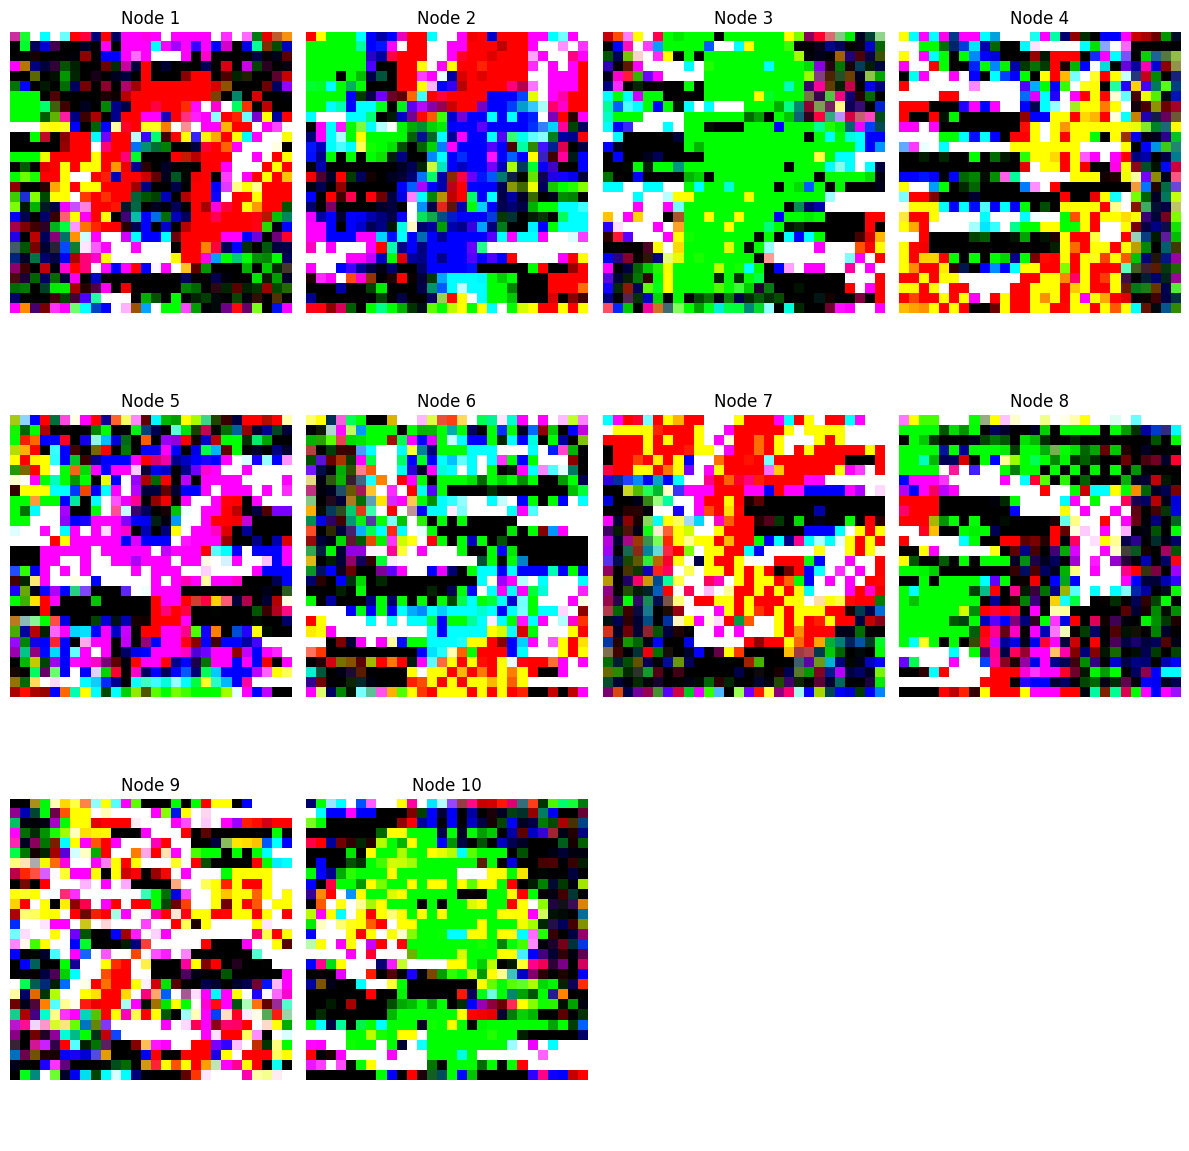

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Configuration
num_channels = 10
cols = 4
rows = (num_channels + cols - 1) // cols # Dynamically calculate rows
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
# Flatten axes for easier iteration if it's a 2D array
axes = axes.flatten()

# Loop through each channel
for channel_idx in range(num_channels):
    # Initialize a fresh random image for each channel
    RandomImage = CreateImage()
    # (Starting from random noise helps visualize what the filter "likes")
    optimizer = optim.Adam([RandomImage], lr=0.1)

    for i in range(100): # Reduced iterations for speed
        optimizer.zero_grad()

        # Forward pass through the first layer (corrected to match SimpleCNN's forward method)
        x = model_cnn.conv1(RandomImage)
        x = F.relu(x)
        x = model_cnn.pool(x)
        x = model_cnn.conv2(x)
        x = F.relu(x)
        x = model_cnn.pool(x)
        x = torch.flatten(x, 1) # Flatten before passing to fc
        x = model_cnn.fc(x)
        # Target specific channel (corrected to select a scalar from the batch output)
        target_activation = x[0, channel_idx]
        loss = -target_activation
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            RandomImage.clamp_(0, 1)

    # Plotting logic
    ax = axes[channel_idx]
    final_img = RandomImage.detach().permute(0, 2, 3, 1).squeeze().numpy()
    ax.imshow(final_img)
    ax.set_title(f"Node {channel_idx+1}")
    ax.axis('off')

# Turn off any remaining empty subplots
for i in range(num_channels, rows * cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
storeDictCNN = {}

In [ ]:
def hookCNNLayer1(module,input,output):
  storeDictCNN['Layer1'] = output

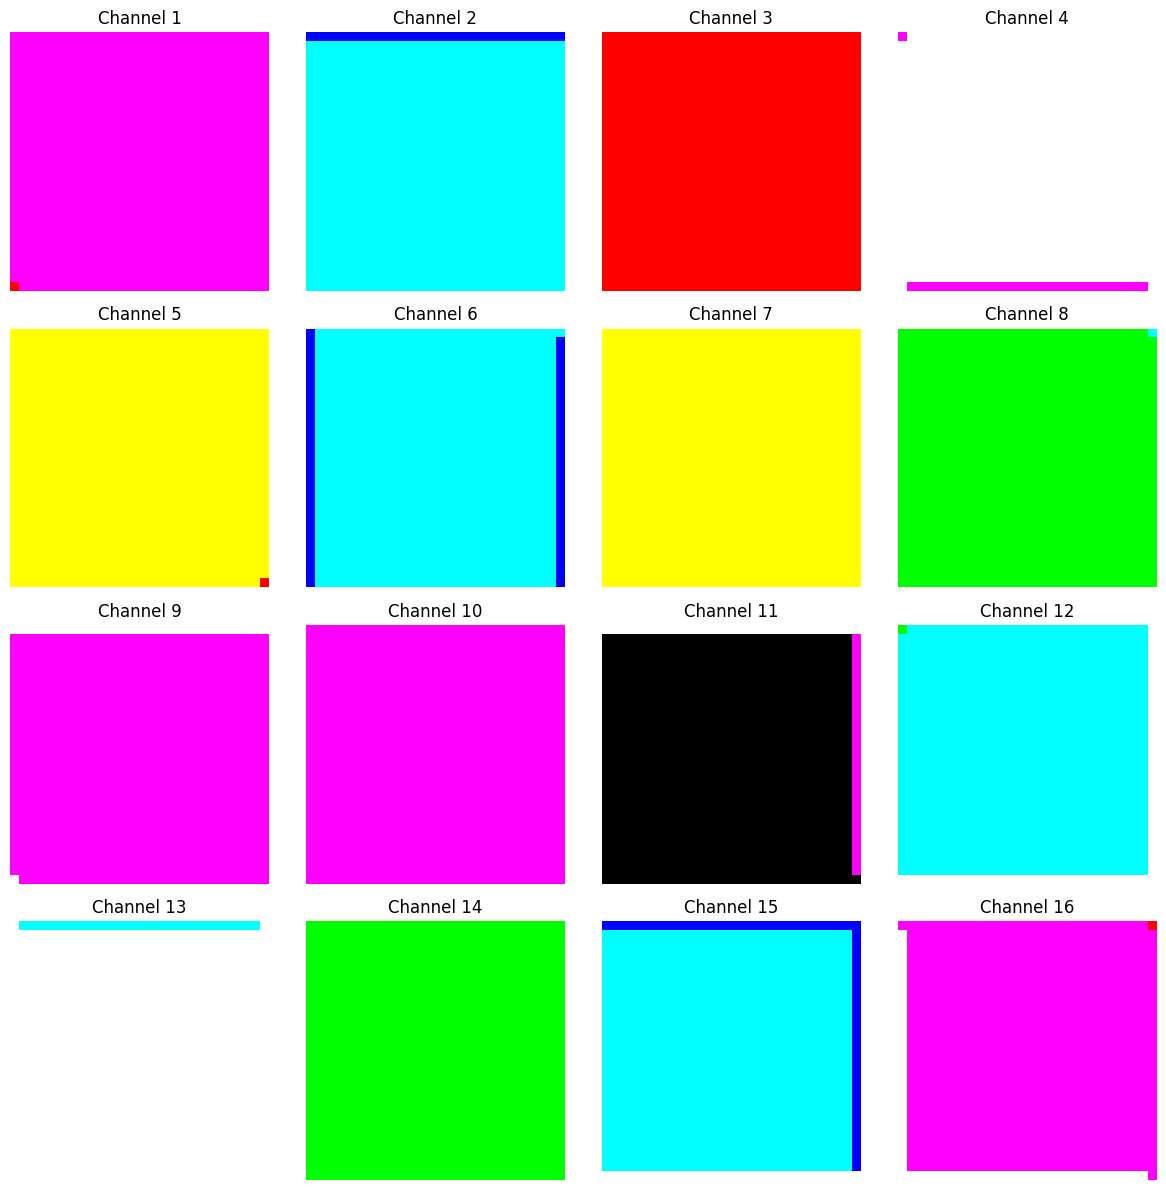

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn

CameraHandle = model_cnn.conv1.register_forward_hook(hookCNNLayer1)
rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
for i in range(16):
    RandomImage = CreateImage()
    optimizer = optim.Adam([RandomImage], lr=0.3)
    for j in range(100):
      _ = model_cnn(RandomImage)
      optimizer.zero_grad()
      TargetChannel = storeDictCNN['Layer1']
      targetActivation = TargetChannel[0, i, :, :].mean()
      loss = -targetActivation
      # print(loss)
      loss.backward()
      optimizer.step()
    with torch.no_grad():
          RandomImage.clamp_(0,1)
    # Plotting logic
    ax = axes[i // cols, i % cols]
    final_img = RandomImage.detach().permute(0, 2, 3, 1).squeeze().numpy()
    ax.imshow(final_img)
    ax.set_title(f"Channel {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()
CameraHandle.remove()

In [ ]:
def hookCNNLayer2(module,input,output):
  storeDictCNN['Layer2'] = output

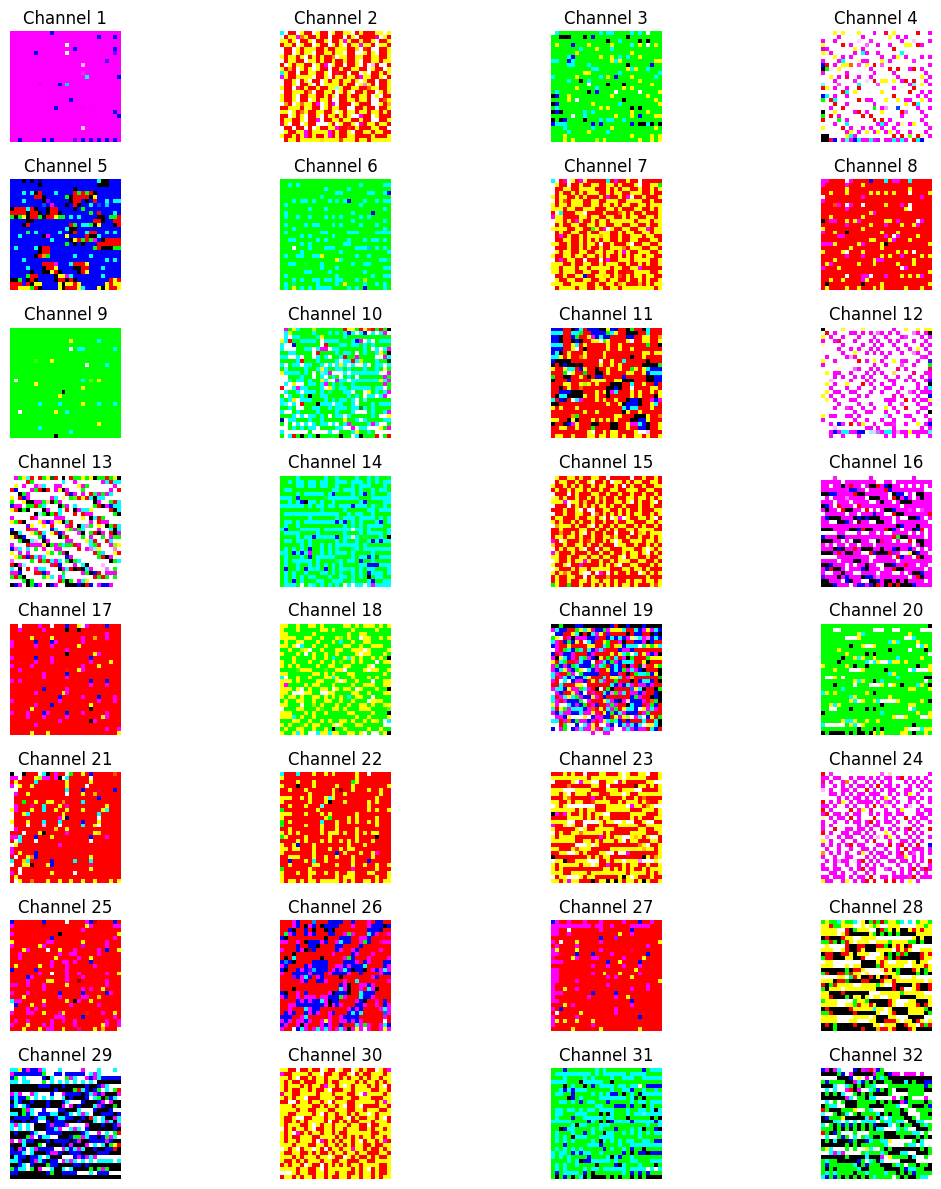

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn

CameraHandle = model_cnn.conv2.register_forward_hook(hookCNNLayer2)

num_channels = 32 # Define num_channels for this cell
rows = (num_channels + cols - 1) // cols # Dynamically calculate rows
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
for i in range(num_channels):
    RandomImage = CreateImage()
    optimizer = optim.Adam([RandomImage], lr=0.3)
    for j in range(100):
      _ = model_cnn(RandomImage)
      optimizer.zero_grad()
      TargetChannel = storeDictCNN['Layer2']
      targetActivation = TargetChannel[0, i, :, :].mean()
      loss = -targetActivation
      # print(loss)
      loss.backward()
      optimizer.step()
    with torch.no_grad():
          RandomImage.clamp_(0,1)
    # Plotting logic
    # Ensure axes is treated as a 2D array even if rows or cols is 1
    if rows == 1 and cols == 1:
        ax = axes
    elif rows == 1 or cols == 1:
        ax = axes[i]
    else:
        ax = axes[i // cols, i % cols]
    final_img = RandomImage.detach().permute(0, 2, 3, 1).squeeze().numpy()
    ax.imshow(final_img)
    ax.set_title(f"Channel {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()
CameraHandle.remove()

In [ ]:
print(model_cnn)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
def hookCNNLinear(module,input,output):
  storeDictCNN['linear'] = output

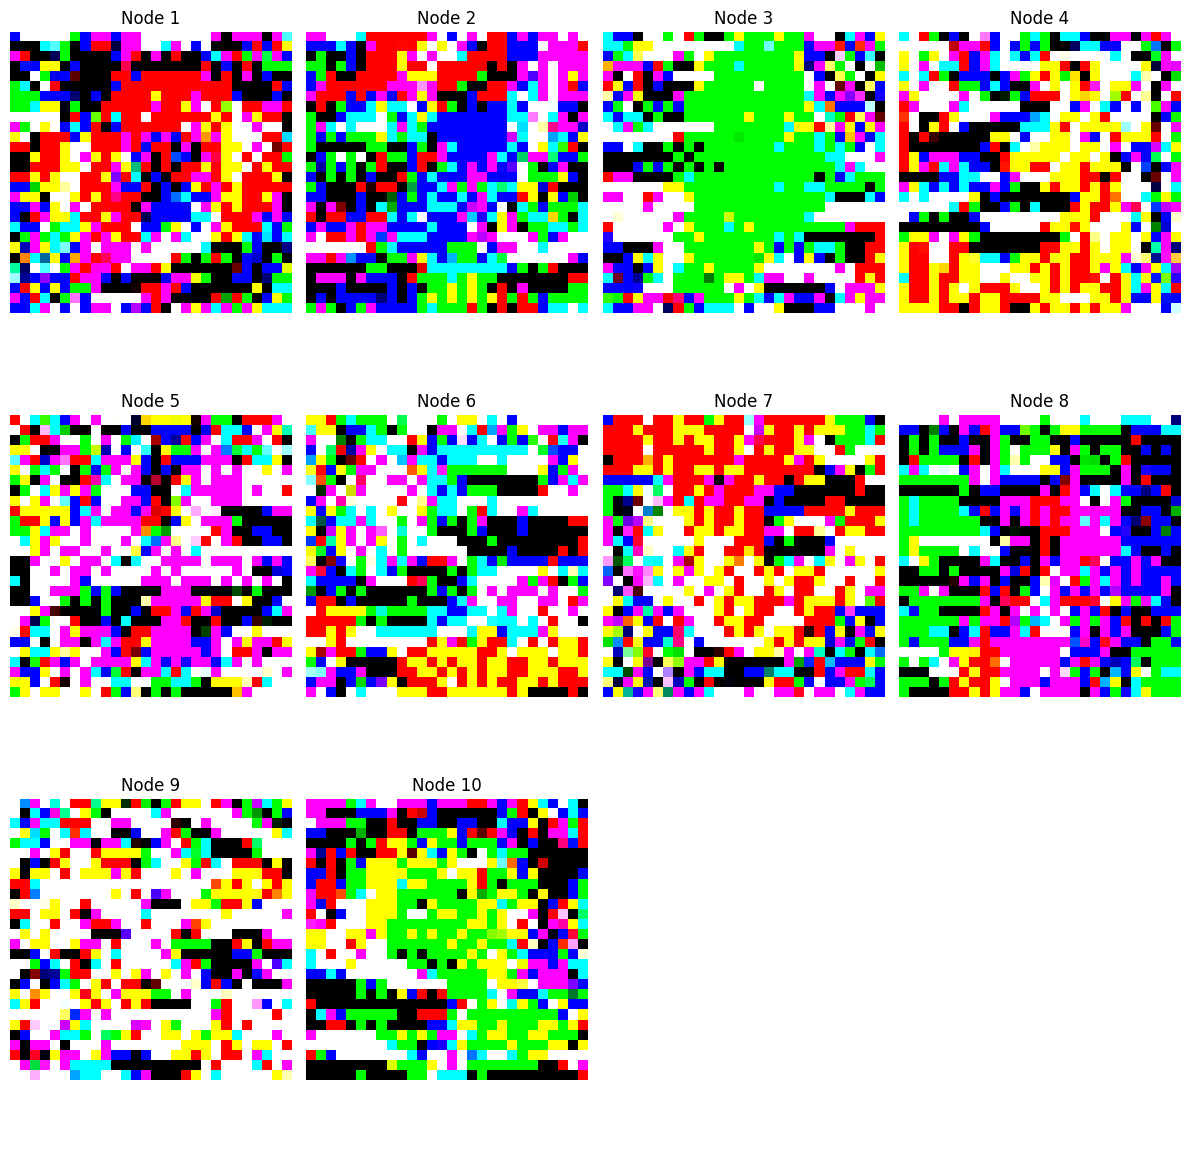

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn

CameraHandle = model_cnn.fc.register_forward_hook(hookCNNLinear)

num_channels = 10 # Define num_channels for this cell
rows = (num_channels + cols - 1) // cols # Dynamically calculate rows
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
# Flatten axes for easier iteration
axes = axes.flatten()

for i in range(num_channels):
    RandomImage = CreateImage()
    optimizer = optim.Adam([RandomImage], lr=0.3)
    for j in range(100):
      _ = model_cnn(RandomImage)
      optimizer.zero_grad()
      TargetChannel = storeDictCNN['linear']
      targetActivation = TargetChannel[0, i]
      loss = -targetActivation
      # print(loss)
      loss.backward()
      optimizer.step()
    with torch.no_grad():
          RandomImage.clamp_(0,1)
    # Plotting logic
    ax = axes[i]
    final_img = RandomImage.detach().permute(0, 2, 3, 1).squeeze().numpy()
    ax.imshow(final_img)
    ax.set_title(f"Node {i+1}")
    ax.axis('off')

# Turn off any remaining empty subplots
for i in range(num_channels, rows * cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
CameraHandle.remove()

In [ ]:
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
StoreTargetData = {}

In [ ]:
def TargetName(name):
  def hook(model , input, output) :
    StoreTargetData[name] = output
  return hook

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn

def probResnet(Name):



  RandomImage = CreateImage()
  CameraHandle = getattr(resnet18,Name).register_forward_hook(TargetName(Name))
  optimizer = optim.Adam([RandomImage], lr=0.3)
  for i in range(250):
    optimizer.zero_grad()
    _ = resnet18(RandomImage)
    targetActivation = StoreTargetData[Name].mean()
    loss = -targetActivation
    # print(loss)
    loss.backward()
    optimizer.step()
  with torch.no_grad():
        RandomImage.clamp_(0,1)
  final_img = RandomImage.detach().cpu().permute(0,2,3,1)[0]
  plt.imshow(final_img)
  plt.title(f"What  Resnet {Name} sees")
  plt.show()
  CameraHandle.remove()

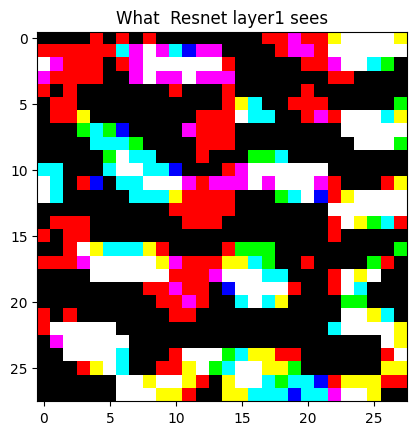

In [ ]:
probResnet('layer1')

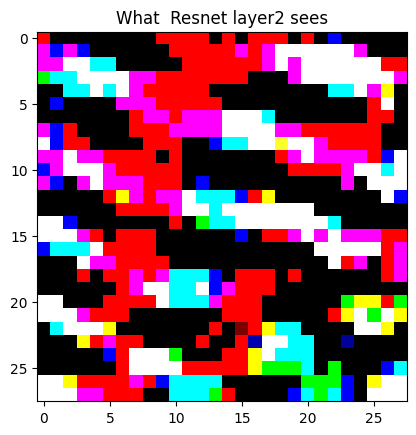

In [ ]:
probResnet('layer2')

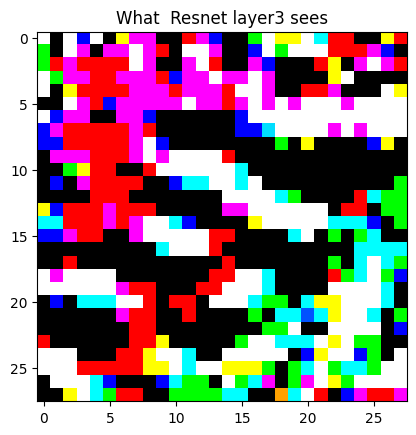

In [ ]:
probResnet('layer3')

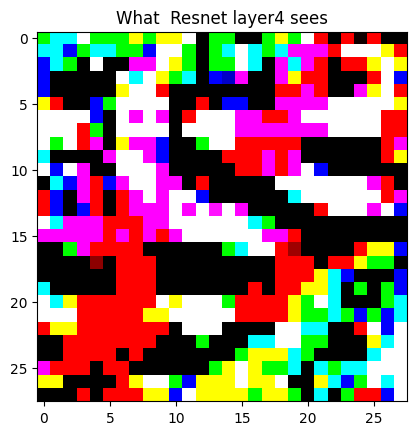

In [ ]:
probResnet('layer4')

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn

def probResnetBlock0layer1(Name):



  RandomImage = CreateImage()
  CameraHandle = resnet18.layer1[0].register_forward_hook(TargetName(Name))
  optimizer = optim.Adam([RandomImage], lr=0.3)
  for i in range(250):
    optimizer.zero_grad()
    _ = resnet18(RandomImage)
    targetActivation = StoreTargetData[Name].mean()
    loss = -targetActivation
    # print(loss)
    loss.backward()
    optimizer.step()
  with torch.no_grad():
        RandomImage.clamp_(0,1)
  final_img = RandomImage.detach().cpu().permute(0,2,3,1)[0]
  plt.imshow(final_img)
  plt.title(f"What  Resnet {Name} sees")
  plt.show()
  CameraHandle.remove()

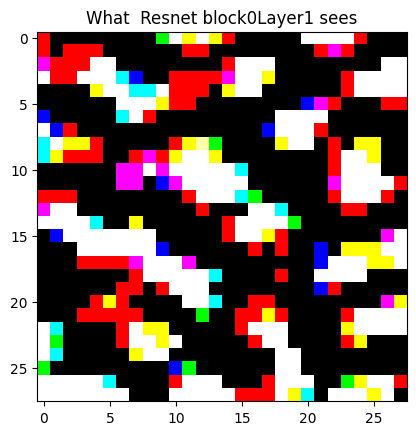

In [ ]:
probResnetBlock0layer1('block0Layer1')

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn

def probResnetBlock1layer1(Name):



  RandomImage = CreateImage()
  CameraHandle = resnet18.layer1[1].register_forward_hook(TargetName(Name))
  optimizer = optim.Adam([RandomImage], lr=0.3)
  for i in range(250):
    optimizer.zero_grad()
    _ = resnet18(RandomImage)
    targetActivation = StoreTargetData[Name].mean()
    loss = -targetActivation
    # print(loss)
    loss.backward()
    optimizer.step()
  with torch.no_grad():
        RandomImage.clamp_(0,1)
  final_img = RandomImage.detach().cpu().permute(0,2,3,1)[0]
  plt.imshow(final_img)
  plt.title(f"What  Resnet {Name} sees")
  plt.show()
  CameraHandle.remove()

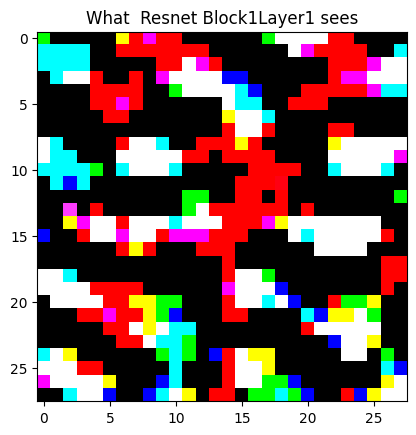

In [ ]:
probResnetBlock1layer1('Block1Layer1')

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn

def probResnetBlock0layer2(Name):



  RandomImage = CreateImage()
  CameraHandle = resnet18.layer2[0].register_forward_hook(TargetName(Name))
  optimizer = optim.Adam([RandomImage], lr=0.3)
  for i in range(250):
    optimizer.zero_grad()
    _ = resnet18(RandomImage)
    targetActivation = StoreTargetData[Name].mean()
    loss = -targetActivation
    # print(loss)
    loss.backward()
    optimizer.step()
  with torch.no_grad():
        RandomImage.clamp_(0,1)
  final_img = RandomImage.detach().cpu().permute(0,2,3,1)[0]
  plt.imshow(final_img)
  plt.title(f"What  Resnet {Name} sees")
  plt.show()
  CameraHandle.remove()

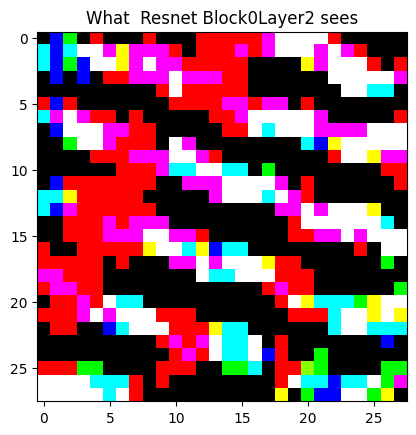

In [ ]:
probResnetBlock0layer2('Block0Layer2')

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn

def probResnetBlock1layer2(Name):



  RandomImage = CreateImage()
  CameraHandle = resnet18.layer2[1].register_forward_hook(TargetName(Name))
  optimizer = optim.Adam([RandomImage], lr=0.3)
  for i in range(100):
    optimizer.zero_grad()
    _ = resnet18(RandomImage)
    targetActivation = StoreTargetData[Name].mean()
    loss = -targetActivation
    # print(loss)
    loss.backward()
    optimizer.step()
  with torch.no_grad():
        RandomImage.clamp_(0,1)
  final_img = RandomImage.detach().cpu().permute(0,2,3,1)[0]
  plt.imshow(final_img)
  plt.title(f"What  Resnet {Name} sees")
  plt.show()
  CameraHandle.remove()

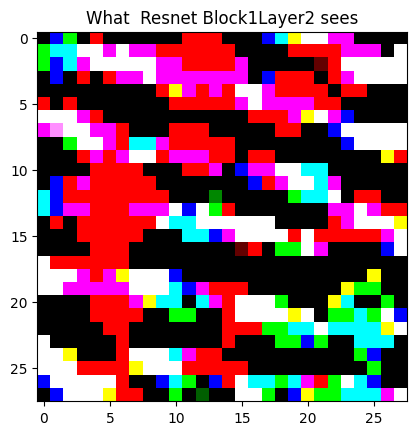

In [ ]:
probResnetBlock1layer2('Block1Layer2')

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn

def probResnetBlock0layer3(Name):



  RandomImage = CreateImage()
  CameraHandle = resnet18.layer3[0].register_forward_hook(TargetName(Name))
  optimizer = optim.Adam([RandomImage], lr=0.3)
  for i in range(100):
    optimizer.zero_grad()
    _ = resnet18(RandomImage)
    targetActivation = StoreTargetData[Name].mean()
    loss = -targetActivation
    # print(loss)
    loss.backward()
    optimizer.step()
  with torch.no_grad():
        RandomImage.clamp_(0,1)
  final_img = RandomImage.detach().cpu().permute(0,2,3,1)[0]
  plt.imshow(final_img)
  plt.title(f"What  Resnet {Name} sees")
  plt.show()
  CameraHandle.remove()

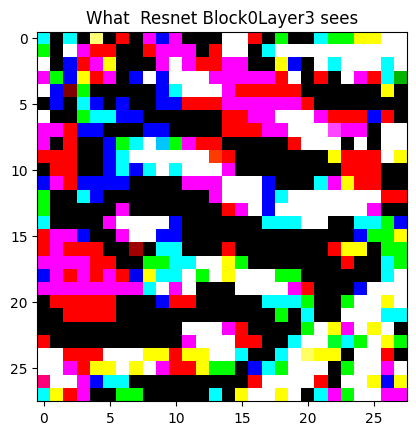

In [ ]:
probResnetBlock0layer3('Block0Layer3')

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn

def probResnetBlock1layer3(Name):



  RandomImage = CreateImage()
  CameraHandle = resnet18.layer3[1].register_forward_hook(TargetName(Name))
  optimizer = optim.Adam([RandomImage], lr=0.3)
  for i in range(100):
    optimizer.zero_grad()
    _ = resnet18(RandomImage)
    targetActivation = StoreTargetData[Name].mean()
    loss = -targetActivation
    # print(loss)
    loss.backward()
    optimizer.step()
  with torch.no_grad():
        RandomImage.clamp_(0,1)
  final_img = RandomImage.detach().cpu().permute(0,2,3,1)[0]
  plt.imshow(final_img)
  plt.title(f"What  Resnet {Name} sees")
  plt.show()
  CameraHandle.remove()

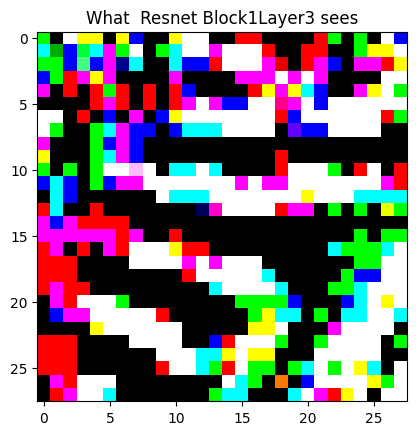

In [ ]:
probResnetBlock1layer3('Block1Layer3')

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn

def probResnetBlock0layer4(Name):



  RandomImage = CreateImage()
  CameraHandle = resnet18.layer4[0].register_forward_hook(TargetName(Name))
  optimizer = optim.Adam([RandomImage], lr=0.3)
  for i in range(100):
    optimizer.zero_grad()
    _ = resnet18(RandomImage)
    targetActivation = StoreTargetData[Name].mean()
    loss = -targetActivation
    # print(loss)
    loss.backward()
    optimizer.step()
  with torch.no_grad():
        RandomImage.clamp_(0,1)
  final_img = RandomImage.detach().cpu().permute(0,2,3,1)[0]
  plt.imshow(final_img)
  plt.title(f"What  Resnet {Name} sees")
  plt.show()
  CameraHandle.remove()

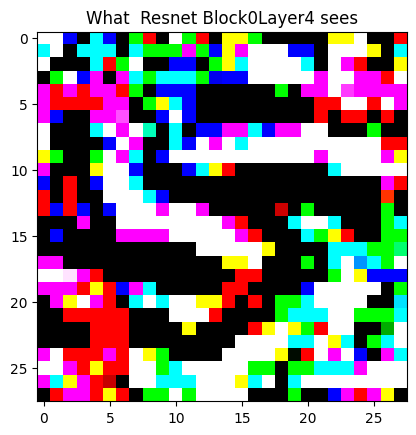

In [ ]:
probResnetBlock0layer4('Block0Layer4')

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn

def probResnetBlock1layer4(Name):



  RandomImage = CreateImage()
  CameraHandle = resnet18.layer4[1].register_forward_hook(TargetName(Name))
  optimizer = optim.Adam([RandomImage], lr=0.3)
  for i in range(100):
    optimizer.zero_grad()
    _ = resnet18(RandomImage)
    targetActivation = StoreTargetData[Name].mean()
    loss = -targetActivation
    # print(loss)
    loss.backward()
    optimizer.step()
  with torch.no_grad():
        RandomImage.clamp_(0,1)
  final_img = RandomImage.detach().cpu().permute(0,2,3,1)[0]
  plt.imshow(final_img)
  plt.title(f"What  Resnet {Name} sees")
  plt.show()
  CameraHandle.remove()

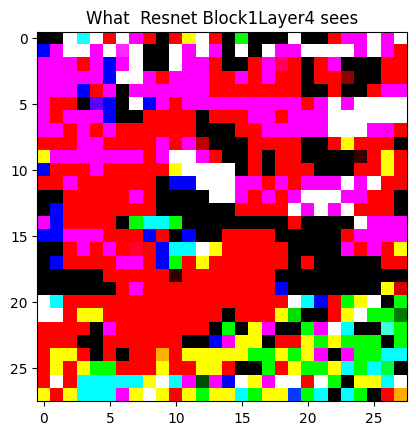

In [ ]:
probResnetBlock1layer4('Block1Layer4')

In [ ]:
dummyImage = CreateImage()

In [ ]:
print(model_cnn)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
x = model_cnn.conv1(dummyImage)
x.shape

torch.Size([1, 16, 28, 28])

In [ ]:
y = x[0,0,:,:]
y.shape

torch.Size([28, 28])

In [ ]:
x = model_cnn.conv2(x)
x.shape

torch.Size([1, 32, 28, 28])

In [ ]:
y = x[0,0,:,:]
y.shape

torch.Size([28, 28])

In [ ]:
x = model_cnn.pool(x)
x.shape

torch.Size([1, 32, 14, 14])